In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import joblib
import itertools
import subprocess
import sklearn.metrics as metrics
from time import time
from scipy import stats
import scipy.optimize as opt  
from scipy.stats import chi2_contingency
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.preprocessing import LabelEncoder

In [2]:
# Uplode data
data = pd.read_csv("~/Desktop/Data Science/Near Earth Objects.csv")

In [3]:
data.head()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True


In [4]:
data.tail()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
90831,3763337,(2016 VX1),0.026580,0.059435,52078.886692,1.230039e+07,Earth,False,25.00,False
90832,3837603,(2019 AD3),0.016771,0.037501,46114.605073,5.432121e+07,Earth,False,26.00,False
90833,54017201,(2020 JP3),0.031956,0.071456,7566.807732,2.840077e+07,Earth,False,24.60,False
90834,54115824,(2021 CN5),0.007321,0.016370,69199.154484,6.869206e+07,Earth,False,27.80,False
90835,54205447,(2021 TW7),0.039862,0.089133,27024.455553,5.977213e+07,Earth,False,24.12,False


In [5]:
data.shape

(90836, 10)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  90836 non-null  int64  
 1   name                90836 non-null  object 
 2   est_diameter_min    90836 non-null  float64
 3   est_diameter_max    90836 non-null  float64
 4   relative_velocity   90836 non-null  float64
 5   miss_distance       90836 non-null  float64
 6   orbiting_body       90836 non-null  object 
 7   sentry_object       90836 non-null  bool   
 8   absolute_magnitude  90836 non-null  float64
 9   hazardous           90836 non-null  bool   
dtypes: bool(2), float64(5), int64(1), object(2)
memory usage: 5.7+ MB


In [7]:
data.isnull().sum()

id                    0
name                  0
est_diameter_min      0
est_diameter_max      0
relative_velocity     0
miss_distance         0
orbiting_body         0
sentry_object         0
absolute_magnitude    0
hazardous             0
dtype: int64

/var/folders/56/58j6rsy54wd0kl7ybktxv8nh0000gp/T/ipykernel_60854/2428780507.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  data.hist(ax=ax, bins = 30)


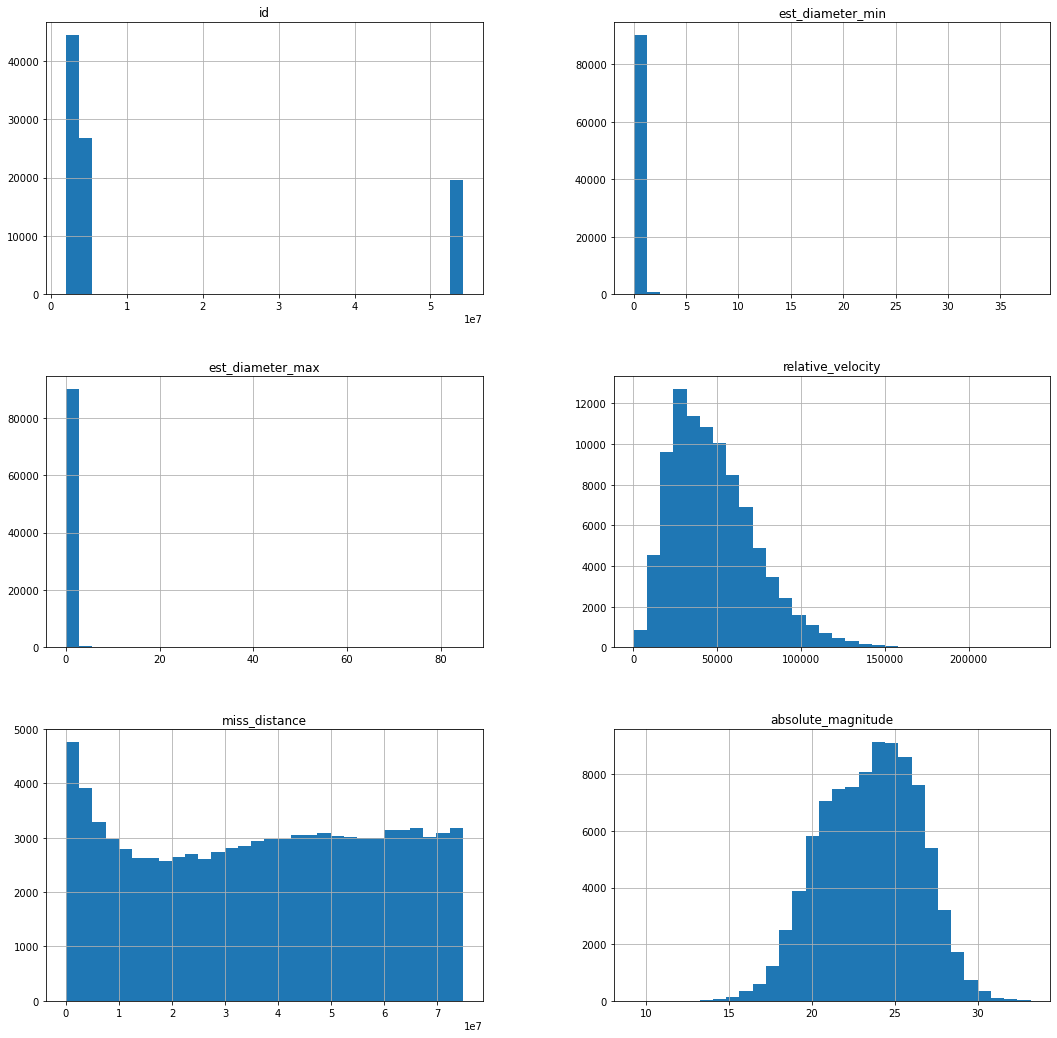

In [8]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(18,18))
ax = fig.gca()
data.hist(ax=ax, bins = 30)
plt.show()

In [9]:
data1 = data.copy()

In [10]:
data = data.drop(['name','orbiting_body', 'sentry_object','id'], axis = 1)

In [11]:
X,y = data.iloc[:,0:5] , data.iloc[:,-1]

In [12]:
data.head()

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
0,1.198271,2.679415,13569.249224,5.483974e+07,16.73,False
1,0.265800,0.594347,73588.726663,6.143813e+07,20.00,True
2,0.722030,1.614507,114258.692129,4.979872e+07,17.83,False
3,0.096506,0.215794,24764.303138,2.543497e+07,22.20,False
4,0.255009,0.570217,42737.733765,4.627557e+07,20.09,True


In [13]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

# Train-test split
xtrain, xtest, ytrain, ytest= train_test_split(X, y, test_size=0.70, random_state=1)

In [14]:
xtrain.head()

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
3617,0.038420,0.085909,43199.079782,4.813613e+07,24.20
65661,0.015295,0.034201,41079.101600,5.505020e+05,26.20
15392,0.175612,0.392681,29226.973830,5.877077e+07,20.90
6885,0.128397,0.287104,58665.388279,5.848875e+07,21.58
78920,0.029144,0.065169,33198.235617,6.373772e+07,24.80


In [15]:
ytrain.head()

3617     False
65661    False
15392     True
6885      True
78920    False
Name: hazardous, dtype: bool

In [16]:
from imblearn.under_sampling import RandomUnderSampler
under_sampler = RandomUnderSampler(random_state=42)
X_res, y_res = under_sampler.fit_resample(X, y)
#print(f"Training target statistics: {Counter(y_pred)}")
#print(f"Testing target statistics: {Counter(ytest)}")

In [17]:
X_res.head()

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
0,0.058151,0.130029,59771.348243,5.816824e+07,23.30
1,0.139494,0.311918,26859.447868,2.253203e+07,21.40
2,0.011603,0.025944,23069.312035,7.145669e+07,26.80
3,0.033928,0.075865,24228.020498,5.486865e+07,24.47
4,0.384198,0.859093,108889.003863,5.435923e+07,19.20


(array([8840.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        8840.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

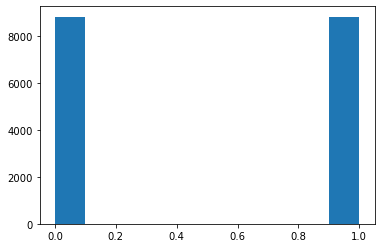

In [18]:
# PLOTTING HISTOGRAMS FOR ALL VARIABLES
import matplotlib.pyplot as plt
from matplotlib.pyplot import hist
#fig = plt.figure(figsize=(18,18))
#ax = fig.gca()

y_res = y_res.apply(lambda x: 1 if x == True else 0)
hist(y_res)

In [19]:
y_res

0        0
1        0
2        0
3        0
4        0
        ..
17675    1
17676    1
17677    1
17678    1
17679    1
Name: hazardous, Length: 17680, dtype: int64

In [20]:
y_res.describe()

count    17680.000000
mean         0.500000
std          0.500014
min          0.000000
25%          0.000000
50%          0.500000
75%          1.000000
max          1.000000
Name: hazardous, dtype: float64

In [21]:
from sklearn.linear_model import LogisticRegression
# Instantiate a LogisticRegression classifier with default parameter values
logreg = LogisticRegression()

# Fit model to the train set
logreg.fit(X_res, y_res)

LogisticRegression()

In [22]:
from sklearn.metrics import confusion_matrix
y_pred = logreg.predict(xtest)

print("Accuracy of logistic regression classifier: ", logreg.score(xtest, ytest))



Accuracy of logistic regression classifier:  0.40732236655867643


In [23]:
confusion_matrix(ytest, y_pred)

array([[21113, 36284],
       [ 1402,  4787]])

In [24]:
from sklearn.preprocessing import MinMaxScaler
# Instantiate MinMaxScaler and use it to rescale X_train and X_test
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX_train = scaler.fit_transform(X_res)
rescaledX_test = scaler.fit_transform(xtest)

In [25]:
from sklearn.linear_model import LogisticRegression
# Instantiate a LogisticRegression classifier with default parameter values
logreg = LogisticRegression()

# Fit model to the train set
logreg.fit(rescaledX_train, y_res)

LogisticRegression()

In [26]:
from sklearn.metrics import confusion_matrix
y_pred = logreg.predict(xtest)

print("Accuracy of logistic regression classifier: ", logreg.score(xtest, ytest))

Accuracy of logistic regression classifier:  0.9007800459220583


/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [27]:
confusion_matrix(ytest, y_pred)

array([[57277,   120],
       [ 6189,     0]])

In [28]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(xtrain, ytrain)

RandomForestClassifier(max_depth=2, random_state=0)

In [29]:
print(metrics.accuracy_score(ytest, y_pred))

0.9007800459220583


In [30]:
y_pred = clf.predict(xtest)
confusion_matrix(ytest,y_pred)

array([[57397,     0],
       [ 6189,     0]])

In [31]:
headers = ['est_diameter_min', 'est_diameter_max', 'relative_velocity', 'miss_distance', 'absolute_magnitude']

feature_imp = pd.Series(clf.feature_importances_, index=headers).sort_values(ascending=False)
feature_imp

est_diameter_max      0.363349
est_diameter_min      0.275623
absolute_magnitude    0.273440
miss_distance         0.063968
relative_velocity     0.023621
dtype: float64

In [32]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score

In [33]:

clf = AdaBoostClassifier(n_estimators=100)
clf.fit(rescaledX_train, y_res)
scores = cross_val_score(clf,rescaledX_train, y_res, cv=5)
scores.mean()

0.8777149321266968

In [34]:
y_pred = clf.predict(rescaledX_test)
confusion_matrix(ytest,y_pred)

array([[54930,  2467],
       [ 5294,   895]])